In [37]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('D:\Философия\Машинное обучение\Модуль 3\Регрессия\Модуль 1.1\Homework M1.1\Homework\data/titanic.csv', 
                 delimiter='\t')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [40]:
# проверка на пропущенные значения
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

In [41]:
# посмотрим наличие уникальных значений
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,156,156,156,31,155
unique,156,2,145,28,3
top,"Braund, Mr. Owen Harris",male,2651,C23 C25 C27,S
freq,1,100,2,2,110


<font size = 3><div style="text-align: justify">**Выжившие / не выжившие:**</div></font>

In [42]:
df['Survived'].value_counts()

0    102
1     54
Name: Survived, dtype: int64

In [43]:
fraction = df['Survived'].value_counts()[1] / len(df) 
fraction

0.34615384615384615

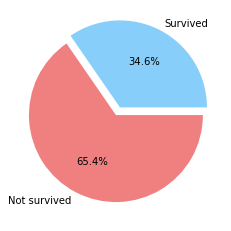

In [44]:
labels = 'Survived', 'Not survived'
sizes = [fraction, 1-fraction]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

Выживших - 34,6%, не выживших - 65,4%.

<font size = 3><div style="text-align: justify">**Класс (1, 2, 3):**</div></font>

In [45]:
df['Pclass'].value_counts()

3    96
1    30
2    30
Name: Pclass, dtype: int64

In [46]:
df[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.400000
2,0.466667
3,0.291667


Выявлена зависимость от класса. С большей вероятностью выживали те пассажиры, которые ехали 1 и 2 классом.

<font size = 3><div style="text-align: justify">**Пункт выезда (S, C, Q):**</div></font>

In [47]:
# посмотрим пункты выезда по количетсву
df['Embarked'].value_counts()

S    110
C     32
Q     13
Name: Embarked, dtype: int64

In [48]:
df['Embarked'] = df['Embarked'].fillna('S') # имеется 1 пропуск, отнесем его к пункту S, так как по данному пункту выше частота
                                            # 71% пассажиров выехали из пункта S
df[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.375000
Q,0.538462
S,0.315315


Выявлена зависимость от пункта выезда. С большей вероятностью выживали те пассажиры, которые выехали из пункта Q.

<font size = 3><div style="text-align: justify">**Пол (мужчины/женщины):**</div></font>

In [49]:
df['Sex'].value_counts()

male      100
female     56
Name: Sex, dtype: int64

In [50]:
df[["Sex", "Survived"]].groupby(['Sex'], ).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.714286
male,0.140000


Выявлена зависимость от пола. С большей вероятностью выживали женщины.

<font size = 3><div style="text-align: justify">**Размер семьи (сам/с семьей):**</div></font>

In [51]:
df['FamilySize'] = df["SibSp"] + df["Parch"]
df["Alone"] = df['FamilySize'] == 0 
df[["Alone", "Survived"]].groupby(['Alone'],).mean().sort_values(by='Alone', ascending=False)

,Survived
Alone,
True,0.329412
False,0.366197


In [52]:
df['Alone'].value_counts()

True     85
False    71
Name: Alone, dtype: int64

Существенной зависимости от того один человек был или с семьей - не выявлено.

<font size = 3><div style="text-align: justify">**Стоимость билета:**</div></font>

In [53]:
# data['Fare'] = data['Fare'].fillna(train['Fare'].median())
# сделаем разбивку оплаты билета по персентилю на 4 категории
df['CategoricalFare'] = pd.qcut(df['Fare'], 4, precision=0) # разбивка по персентилям
df[["CategoricalFare", "Survived"]].groupby(['CategoricalFare'],).mean().sort_values(by='CategoricalFare', ascending=False)

,Survived
CategoricalFare,
"(30.0, 263.0]",0.333333
"(14.0, 30.0]",0.394737
"(8.0, 14.0]",0.300000
"(6.0, 8.0]",0.358974


In [54]:
df['CategoricalFare'].value_counts()

(8.0, 14.0]      40
(6.0, 8.0]       39
(30.0, 263.0]    39
(14.0, 30.0]     38
Name: CategoricalFare, dtype: int64

Существенной зависимости от того сколько человек заплатил за билет - не выявлено.

<font size = 3><div style="text-align: justify">**Возраст:**</div></font>

In [55]:
# заполним пропуски по возрасту и разобьем возраст на 5 категорий
age_mean = df['Age'].mean()
age_std = df['Age'].std()
null_values_count = df['Age'].isnull().count() 
age_null_random_list = np.random.randint(age_mean - age_std, age_mean + age_std, size=null_values_count)


df['Age'][np.isnan(df['Age'])] = age_null_random_list
df['CategoricalAge'] = pd.cut(df['Age'], 5, precision=0)
df[["CategoricalAge", "Survived"]].groupby(['CategoricalAge'],).mean().sort_values(by='CategoricalAge', ascending=False)

C:\Users\skapr\AppData\Local\Temp/ipykernel_35444/3287436642.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][np.isnan(df['Age'])] = age_null_random_list


,Survived
CategoricalAge,
"(57.0, 71.0]",0.166667
"(43.0, 57.0]",0.166667
"(29.0, 43.0]",0.391304
"(15.0, 29.0]",0.323944
"(1.0, 15.0]",0.476190


В целом можно отметить, что с увеличением возраста снижается вероятность выживаемость.

<font size = 3><div style="text-align: justify">**Преобразование данных:**</div></font>

In [56]:
# преобразуем оплату билетов и возраст из интервалов числа, для этого возьмем только правые границы интервалов
def rightValue(interval):
  return interval.right

df['CategoricalAge'] = df['CategoricalAge'].apply(rightValue)
df['CategoricalFare'] = df['CategoricalFare'].apply(rightValue)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,CategoricalFare,CategoricalAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False,8.0,29.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,263.0,43.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True,8.0,29.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,263.0,43.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True,14.0,43.0


In [57]:
# удалим лишние столбцы
drop_elements = ['PassengerId', 'Name', 'Age', 'SibSp', \
                 'Parch', 'Ticket', 'Fare', 'Cabin', 'FamilySize', 'Alone']
df = df.drop(drop_elements, axis = 1)

In [58]:
df.head()

,Survived,Pclass,Sex,Embarked,CategoricalFare,CategoricalAge
0,0,3,male,S,8.0,29.0
1,1,1,female,C,263.0,43.0
2,1,3,female,S,8.0,29.0
3,1,1,female,S,263.0,43.0
4,0,3,male,S,14.0,43.0


In [59]:
df.isnull().sum()

Survived           0
Pclass             0
Sex                0
Embarked           0
CategoricalFare    0
CategoricalAge     0
dtype: int64

In [60]:
# воспользуемся encoding LabelEncoder, чтобы преобразовать CategoricalFare, CategoricalAge и Sex
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['CategoricalFare'] = encoder.fit_transform(df[['CategoricalFare']])
df['CategoricalAge'] = encoder.fit_transform(df[['CategoricalAge']])
df['Sex'] = encoder.fit_transform(df[['Sex']])
df.head()

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Survived,Pclass,Sex,Embarked,CategoricalFare,CategoricalAge
0,0,3,1,S,0,1
1,1,1,0,C,3,2
2,1,3,0,S,0,1
3,1,1,0,S,3,2
4,0,3,1,S,1,2


In [61]:
# воспользуемся encoding OneHotEncoder, чтобы преобразовать
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Embarked']]).toarray())

df = df.join(enc_df)
df = df.drop(['Embarked'], axis = 1)
df.reset_index()

df.head()

,Survived,Pclass,Sex,CategoricalFare,CategoricalAge,0,1,2
0,0,3,1,0,1,0.0,0.0,1.0
1,1,1,0,3,2,1.0,0.0,0.0
2,1,3,0,0,1,0.0,0.0,1.0
3,1,1,0,3,2,0.0,0.0,1.0
4,0,3,1,1,2,0.0,0.0,1.0


In [62]:
df=df.rename({0: 'C', 1: 'Q', 2: 'S'}, axis='columns')
df.head()

,Survived,Pclass,Sex,CategoricalFare,CategoricalAge,C,Q,S
0,0,3,1,0,1,0.0,0.0,1.0
1,1,1,0,3,2,1.0,0.0,0.0
2,1,3,0,0,1,0.0,0.0,1.0
3,1,1,0,3,2,0.0,0.0,1.0
4,0,3,1,1,2,0.0,0.0,1.0


<font size = 3><div style="text-align: justify">**Классификация:**</div></font>

In [63]:
Y = df['Survived'] 
X = df.drop(columns=['Survived'])

In [75]:
!pip install xgboost

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score

[17:38:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

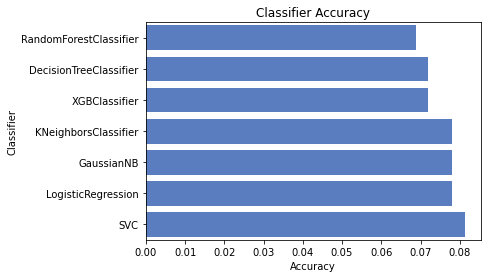

In [66]:
classifiers = [
    KNeighborsClassifier(5),
    SVC(probability=True, kernel='rbf'),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression(),
    XGBClassifier(),
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
acc_dict = {}

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, Y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b")

[17:38:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<AxesSubplot:title={'center':'Classifier f1'}, xlabel='f1', ylabel='Classifier'>

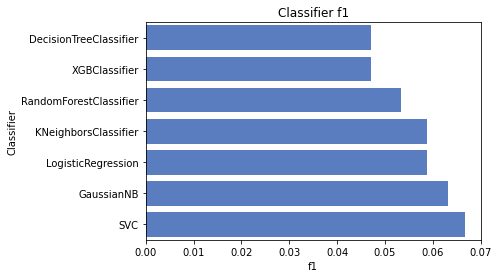

In [67]:
classifiers = [
    KNeighborsClassifier(5),
    SVC(probability=True, kernel='rbf'),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression(),
    XGBClassifier(),
]

log_cols = ["Classifier", "f1"]
log = pd.DataFrame(columns=log_cols)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
acc_dict = {}

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, Y_train)
    train_predictions = clf.predict(X_test)
    acc = f1_score(Y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('f1')
plt.title('Classifier f1')

sns.set_color_codes("muted")
sns.barplot(x='f1', y='Classifier', data=log.sort_values(by='f1'), color="b")

Accuracy и f1_score показывают, что наилучший результат дает метод SVC (метод опорных векторов).

<font size = 3><div style="text-align: justify">**Рассмотрим классификатора SVC (метод опорных векторов):**</div></font>

In [68]:
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0) # linear - линейное ядро, sigmoid - сигмоидальное ядро, 
# poly - полиномиальное ядро и ядро rbf
svm.fit(X_train, Y_train)

print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train, Y_train)))
print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test, Y_test)))
print('R2 score', round(r2_score(svm.predict(X_test), Y_test), 2))
print('f1 score', round(f1_score(svm.predict(X_test), Y_test), 2))

The accuracy of the svm classifier on training data is 0.81 out of 1
The accuracy of the svm classifier on test data is 0.81 out of 1
R2 score 0.17
f1 score 0.67


In [69]:
svm.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [70]:
Y_test_arr = Y_test.to_numpy()
Y_test_arr

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

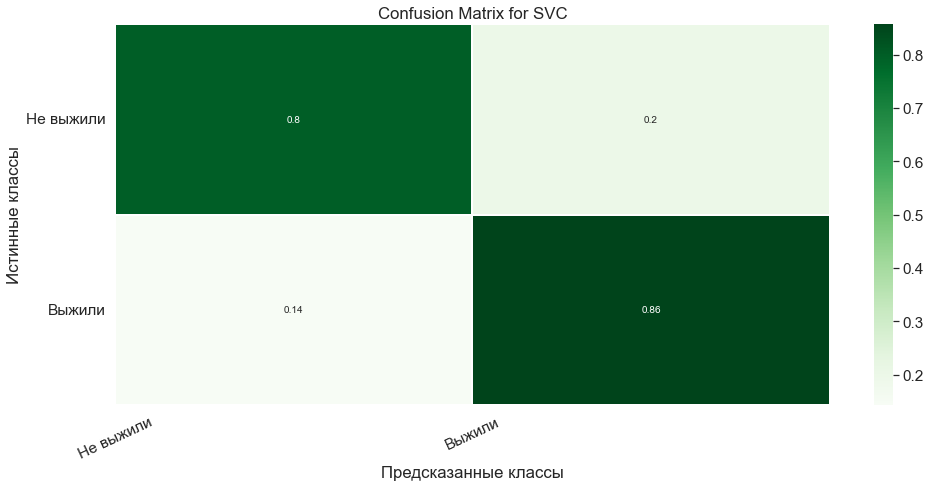

In [71]:
# так же матрица в процентах и более изящном виде
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test, svm.predict(X_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Не выжили', 'Выжили']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Confusion Matrix for SVC')
plt.show()

In [72]:
confusion_matrix(Y_test, svm.predict(X_test))

array([[20,  5],
       [ 1,  6]], dtype=int64)

Интерпритация графика (см. выше):

По тем, кто не выжил в 20 случаях (80%) классификатор предсказал правильно и в 5 случаях (20%) классификатор ошибся. 
Всего - 25 не выживших.

По тем, кто выжил в 6 случаях (86%) классификатор предсказал правильно и в 1 случае (14%) классификатор ошибся.
Всего - 7 выживших.

Text(0.5, 0, 'Permutation Importance')

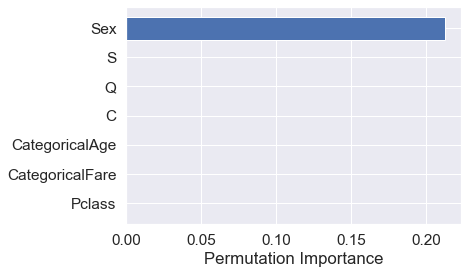

In [76]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
#svm.fit(X_train, Y_train)

perm_importance = permutation_importance(svm, X_test, Y_test)

feature_names = ['Pclass', 'Sex', 'CategoricalFare', 'CategoricalAge', 'C', 'Q', 'S']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [74]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'CategoricalFare', 'CategoricalAge', 'C',
       'Q', 'S'],
      dtype='object')

In [78]:
perm_importance.importances_mean[sorted_idx]

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.2125])

<font size = 3><div style="text-align: justify">**Все, что ниже, смотреть не нужно!**</div></font>

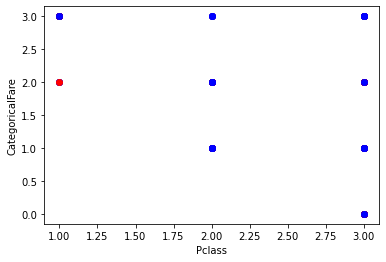

In [130]:
for n in range(0,156):
    if df['Survived'][n] == 1:
        plt.scatter(df['Pclass'][n], df['CategoricalFare'][n], color = 'red')
        plt.xlabel('Pclass')
        plt.ylabel('CategoricalFare')
    elif df['Survived'][n] == 0:
        plt.scatter(df['Pclass'][n], df['CategoricalFare'][n], color = 'blue')
        plt.xlabel('Pclass')
        plt.ylabel('CategoricalFare')
    
    #elif iris['species'][n] == 'virginica':
    #plt.scatter(df['sepal_length'][n], df['sepal_width'][n], color = 'green')
    #plt.xlabel('sepal_length')
    #plt.ylabel('sepal_width')

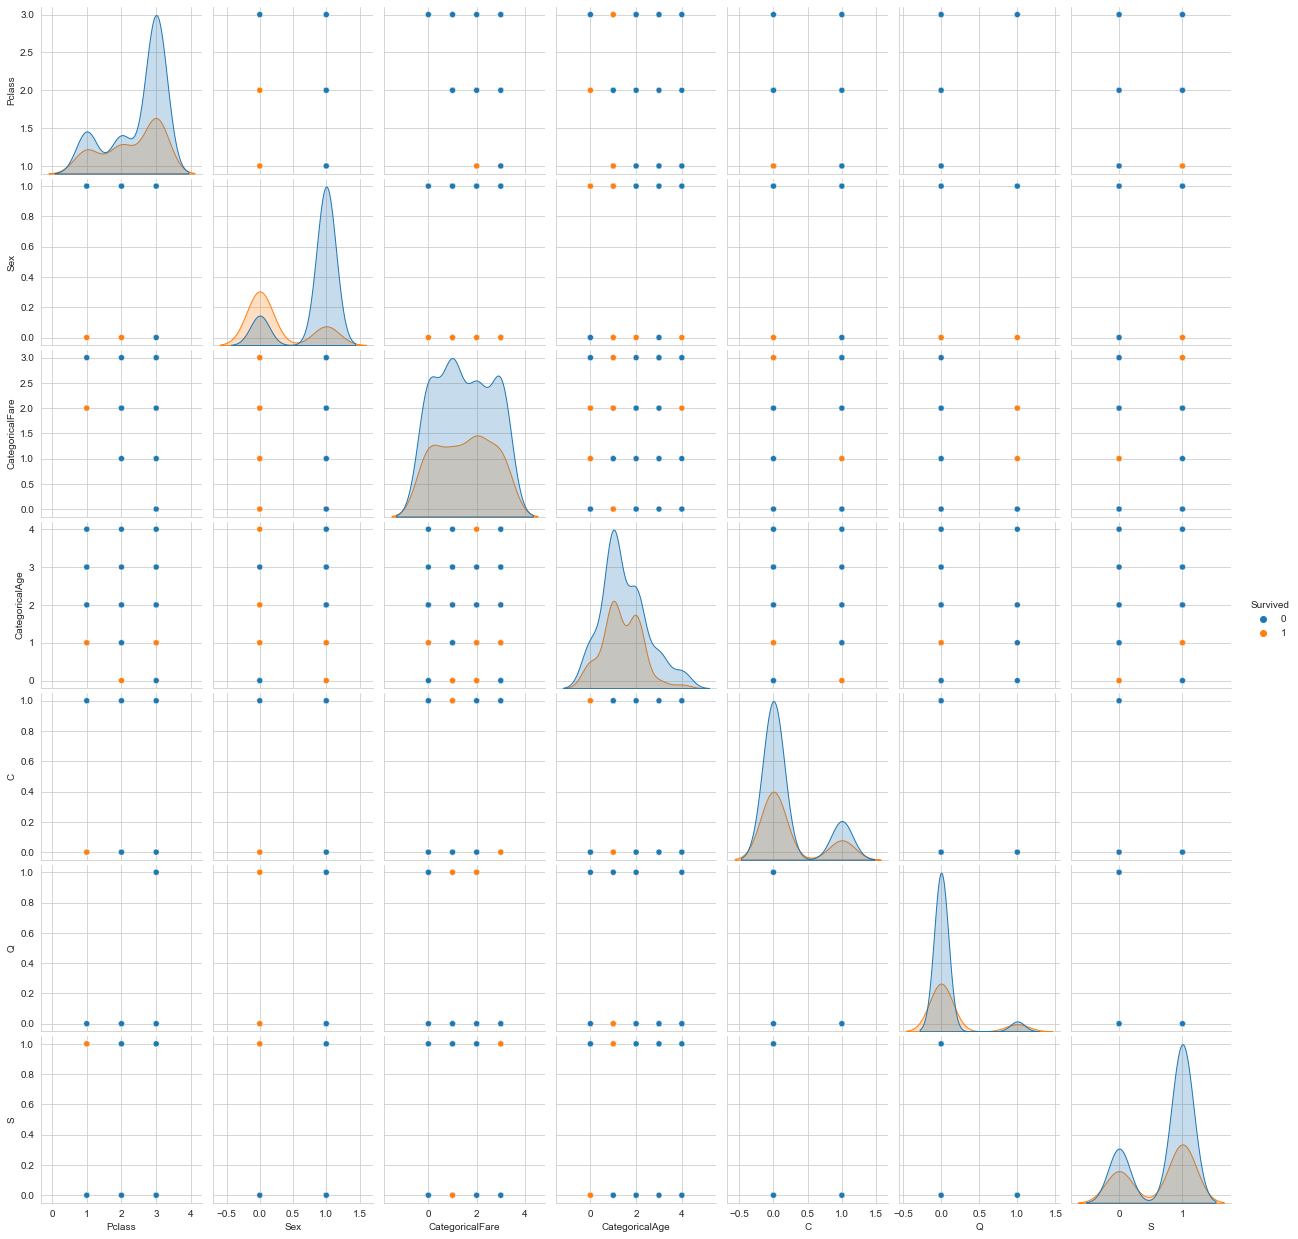

In [139]:
import seaborn as sns
sns.set_style("whitegrid");
sns.pairplot(df, hue="Survived")
plt.show()

<font size = 3><div style="text-align: justify">**Пример на ирисах**</div></font>

In [31]:
# подгружаем датасет по ирисам
from sklearn import datasets 
iris = datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Для наглядности оставим только первые две функции набора данных (длина Sepal и ширина Sepal). Мы можем построить их и использовать цвета, чтобы показать их класс (вид).

In [32]:
sepal_length = iris.data[:,2] 
sepal_width = iris.data[:,3] 

In [11]:
sepal_length

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [12]:
sepal_width

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

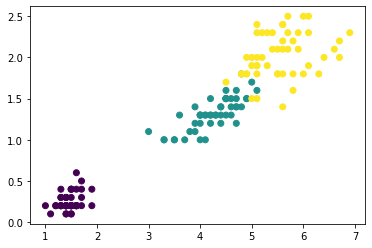

In [13]:
plt.scatter(sepal_length, sepal_width, c=iris.target)

In [33]:
# создаем переменные
X = iris.data[:, [2, 3]]
Y = iris.target

In [34]:
# делим выборку на train и test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)

In [17]:
# обучаем
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, Y_train)

print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train, Y_train)))
print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test, Y_test)))

The accuracy of the svm classifier on training data is 0.97 out of 1
The accuracy of the svm classifier on test data is 0.98 out of 1


In [20]:
import warnings
from matplotlib.colors import ListedColormap

def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, Y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(Y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(Y)):
        plt.scatter(x=X[Y == cl, 0], y=X[Y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


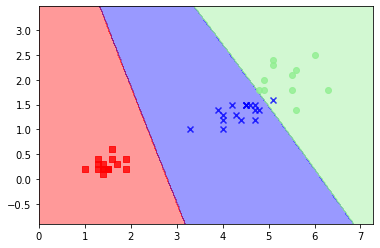

In [21]:
plot_decision_regions(X_test, Y_test, svm)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, Y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(X_train, Y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(X_test, Y_test)))

The accuracy of the knn classifier is 0.95 out of 1 on training data
The accuracy of the knn classifier is 0.98 out of 1 on test data


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


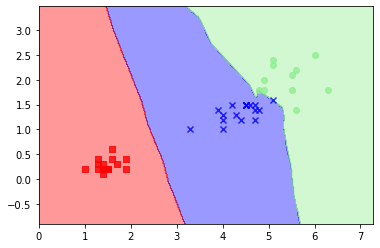

In [24]:
plot_decision_regions(X_test, Y_test, knn)

In [25]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, Y_train)

print('The accuracy of the xgb classifier is {:.2f} out of 1 on training data'.format(xgb_clf.score(X_train, Y_train)))
print('The accuracy of the xgb classifier is {:.2f} out of 1 on test data'.format(xgb_clf.score(X_test, Y_test)))

[17:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of the xgb classifier is 0.99 out of 1 on training data
The accuracy of the xgb classifier is 0.98 out of 1 on test data


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


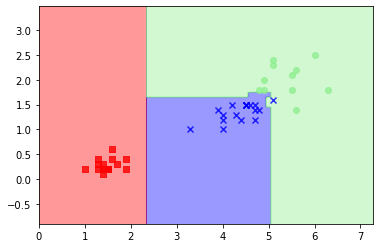

In [26]:
plot_decision_regions(X_test, Y_test, xgb_clf)

В среднем все классификаторы дают хороший результат. Наилучший результат дает xgboost, но если стандартизировать X_train и X_test, то наилучший результат даст KNN (см. ниже).

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, Y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(X_train_std, Y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(X_test_std, Y_test)))

The accuracy of the knn classifier is 0.95 out of 1 on training data
The accuracy of the knn classifier is 1.00 out of 1 on test data


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


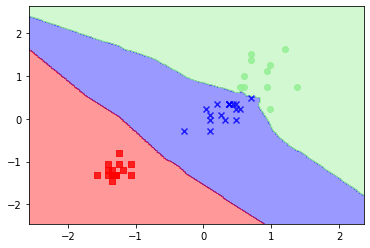

In [30]:
plot_decision_regions(X_test_std, Y_test, knn)

<font size = 3><div style="text-align: justify">**Важность характеристик (переменных) для SVC**</div></font>

Text(0.5, 0, 'Permutation Importance')

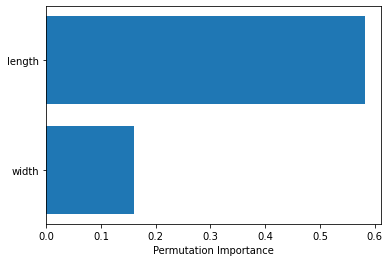

In [36]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, Y_train)

perm_importance = permutation_importance(svm, X_test, Y_test)

feature_names = ['length', 'width']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

Наиболее важной характеристикой является длина лепестка.